# Previsão de Dificuldades de Enfrentamento em Saúde Mental

## Introdução

A saúde mental desempenha um papel significativo na qualidade de vida das pessoas, afetando o bem-estar emocional, o desempenho no trabalho e os relacionamentos interpessoais. Apesar da sua importância, as condições de saúde mental muitas vezes não recebem a atenção e o cuidado adequados, devido ao estigma associado e à falta de acesso a recursos de qualidade.

Este projeto visa desenvolver um modelo de previsão para identificar indivíduos em risco de enfrentar dificuldades de enfrentamento em saúde mental. Ao analisar uma ampla gama de dados médicos, demográficos e comportamentais, pretendemos identificar padrões e correlações que possam indicar uma maior probabilidade de dificuldades de enfrentamento.

## Objetivo

O objetivo principal deste projeto é desenvolver um modelo preditivo capaz de identificar indivíduos que podem estar em risco de enfrentar dificuldades de enfrentamento em saúde mental. Ao antecipar essas dificuldades, esperamos facilitar a intervenção precoce e o fornecimento de apoio direcionado para aqueles que mais precisam.

## Metodologia

Nossa abordagem envolverá a análise de um extenso conjunto de dados que inclui informações médicas, demográficas e comportamentais de pacientes. Utilizando técnicas de aprendizado de máquina, desenvolveremos modelos preditivos que podem prever com precisão a probabilidade de um indivíduo enfrentar dificuldades de enfrentamento em saúde mental.

## Importância

A previsão precisa das dificuldades de enfrentamento pode ser uma ferramenta valiosa para melhorar a detecção precoce e a intervenção em problemas de saúde mental. Ao identificar e apoiar precocemente as pessoas em risco, podemos potencialmente reduzir o impacto negativo dessas dificuldades e melhorar o bem-estar emocional e psicológico da população.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
mental = pd.read_csv('Mental Health Dataset.csv')
mental.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [3]:
mental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [4]:
mental.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [5]:
missing = (mental.isna().mean() * 100).round(1)

In [6]:
print(f'Porcentagem de valores "missing"{missing} ')


Porcentagem de valores "missing"Timestamp                  0.0
Gender                     0.0
Country                    0.0
Occupation                 0.0
self_employed              1.8
family_history             0.0
treatment                  0.0
Days_Indoors               0.0
Growing_Stress             0.0
Changes_Habits             0.0
Mental_Health_History      0.0
Mood_Swings                0.0
Coping_Struggles           0.0
Work_Interest              0.0
Social_Weakness            0.0
mental_health_interview    0.0
care_options               0.0
dtype: float64 


Menos de 2% de valores missing, vamos tirar eles da analise, tendo em vista que o impacto sera minimo

In [7]:
mental.dropna(inplace = True)

In [8]:
mental.isna().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [9]:
print('Quantidade de duplicatas: {:,}'.format(mental.duplicated().sum()))
print('Porcentagem de duplicatas: {:.1%}'.format(mental.duplicated().mean()))

Quantidade de duplicatas: 2,304


Porcentagem de duplicatas: 0.8%


A mesma logica aqui, menos de 1%, vamos dropar

In [10]:
mental.drop_duplicates(inplace = True)

print('Quantidade de duplicatas: {:,}'.format(mental.duplicated().sum()))

Quantidade de duplicatas: 0


In [11]:
#não vamos usar o timestamp, então ja vamos dropar
mental.drop(columns = 'Timestamp', inplace = True)

In [12]:
mental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284858 entries, 3 to 292363
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   284858 non-null  object
 1   Country                  284858 non-null  object
 2   Occupation               284858 non-null  object
 3   self_employed            284858 non-null  object
 4   family_history           284858 non-null  object
 5   treatment                284858 non-null  object
 6   Days_Indoors             284858 non-null  object
 7   Growing_Stress           284858 non-null  object
 8   Changes_Habits           284858 non-null  object
 9   Mental_Health_History    284858 non-null  object
 10  Mood_Swings              284858 non-null  object
 11  Coping_Struggles         284858 non-null  object
 12  Work_Interest            284858 non-null  object
 13  Social_Weakness          284858 non-null  object
 14  mental_health_interv

Maior parte é data ou objeto, não temos muito como remover outiliers, vamos a parte divertida, visualização

In [13]:

def contagrafico(category, figsize=(10, 6)):
    plt.figure(figsize=figsize)  
    
    sns.countplot(data=mental, x=category)
    plt.ylabel("Contagem")
    plt.title(f"{category} Distribuição")
    plt.show()

    category_counts = mental[category].value_counts()
    category_percentages = mental[category].value_counts(normalize=True)

    stats_df = pd.DataFrame({"Contagem": category_counts, "Proporção": category_percentages})
    stats_df["Contagem"] = stats_df["Contagem"].apply("{:,}".format)
    stats_df["Proporção"] = stats_df["Proporção"].apply("{:.1%}".format)
    
    print(stats_df)




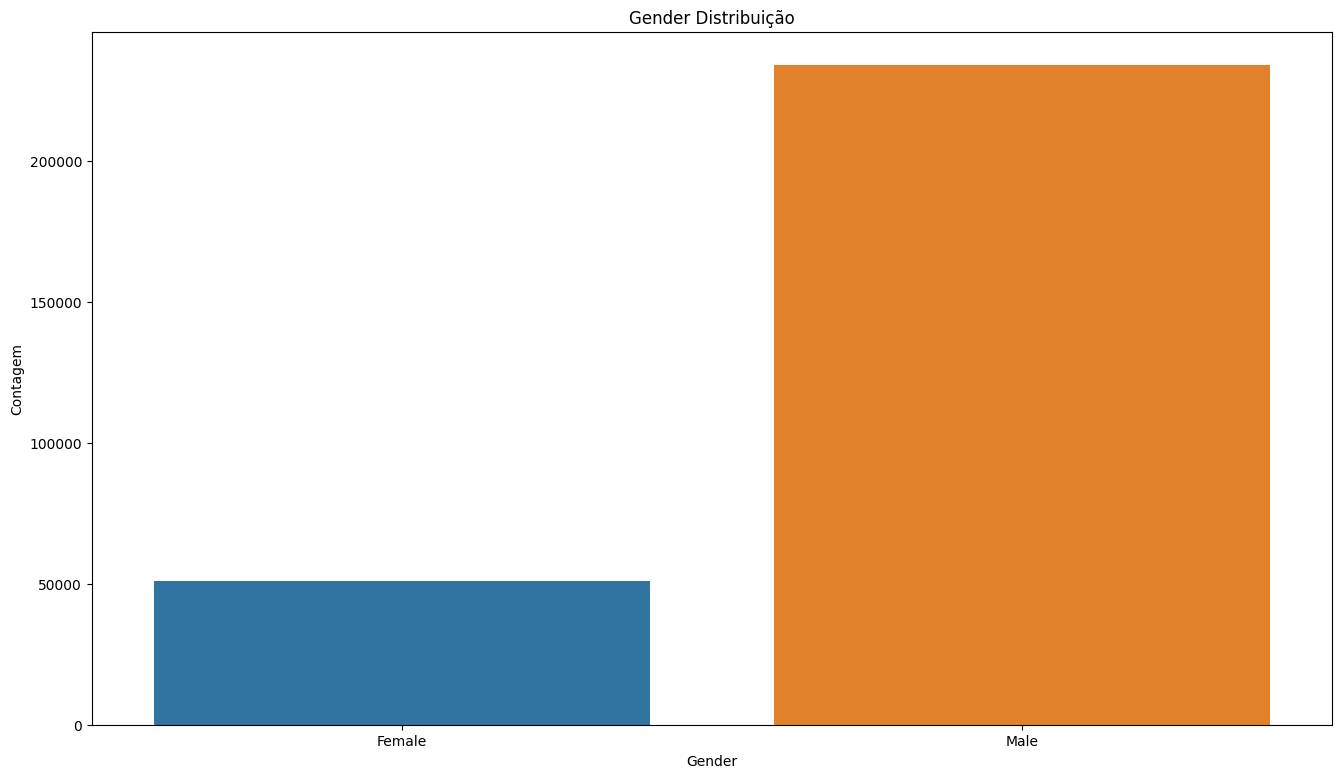

       Contagem Proporção
Male    234,000     82.1%
Female   50,858     17.9%


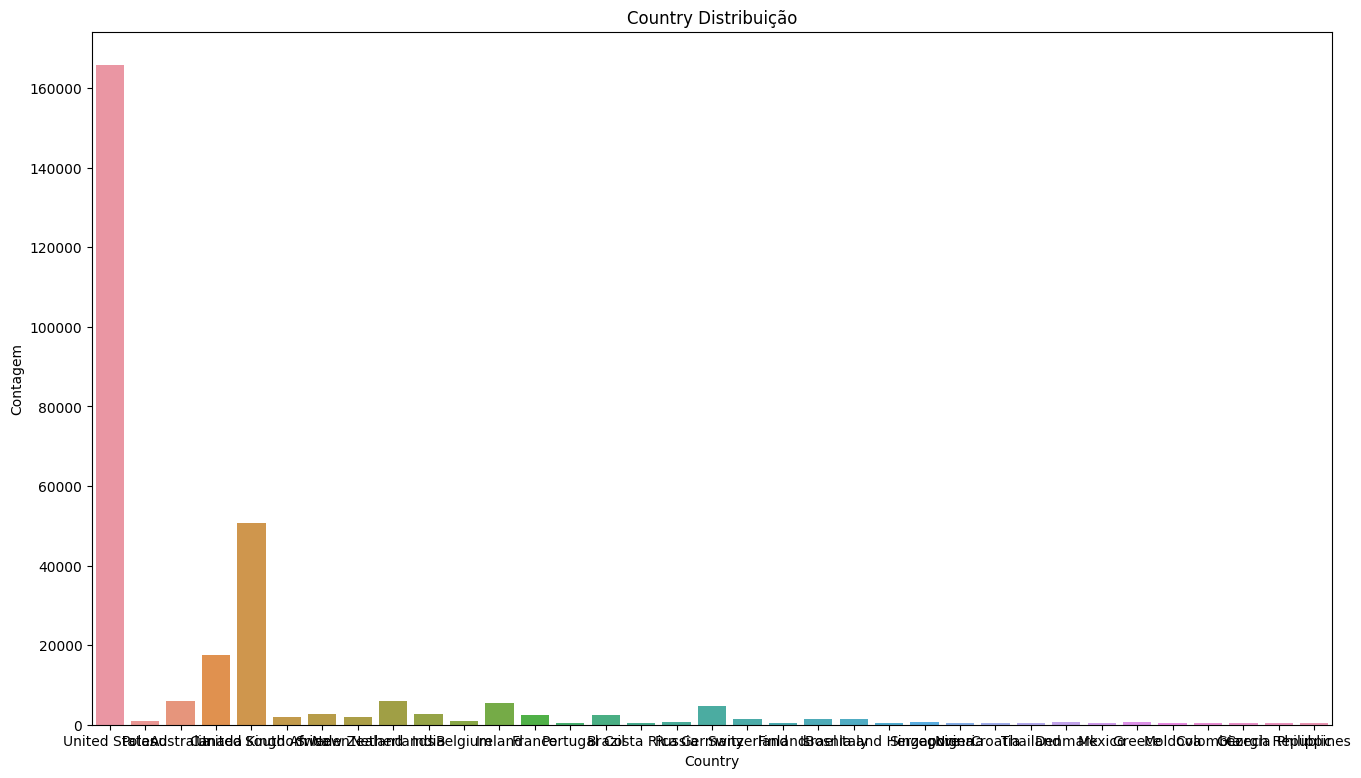

                       Contagem Proporção
United States           165,869     58.2%
United Kingdom           50,576     17.8%
Canada                   17,529      6.2%
Australia                 6,014      2.1%
Netherlands               5,891      2.1%
Ireland                   5,542      1.9%
Germany                   4,680      1.6%
Sweden                    2,812      1.0%
India                     2,771      1.0%
France                    2,340      0.8%
Brazil                    2,340      0.8%
New Zealand               1,991      0.7%
South Africa              1,991      0.7%
Switzerland               1,560      0.5%
Israel                    1,560      0.5%
Italy                     1,560      0.5%
Belgium                     821      0.3%
Poland                      821      0.3%
Russia                      780      0.3%
Denmark                     780      0.3%
Singapore                   780      0.3%
Greece                      780      0.3%
Czech Republic              390   

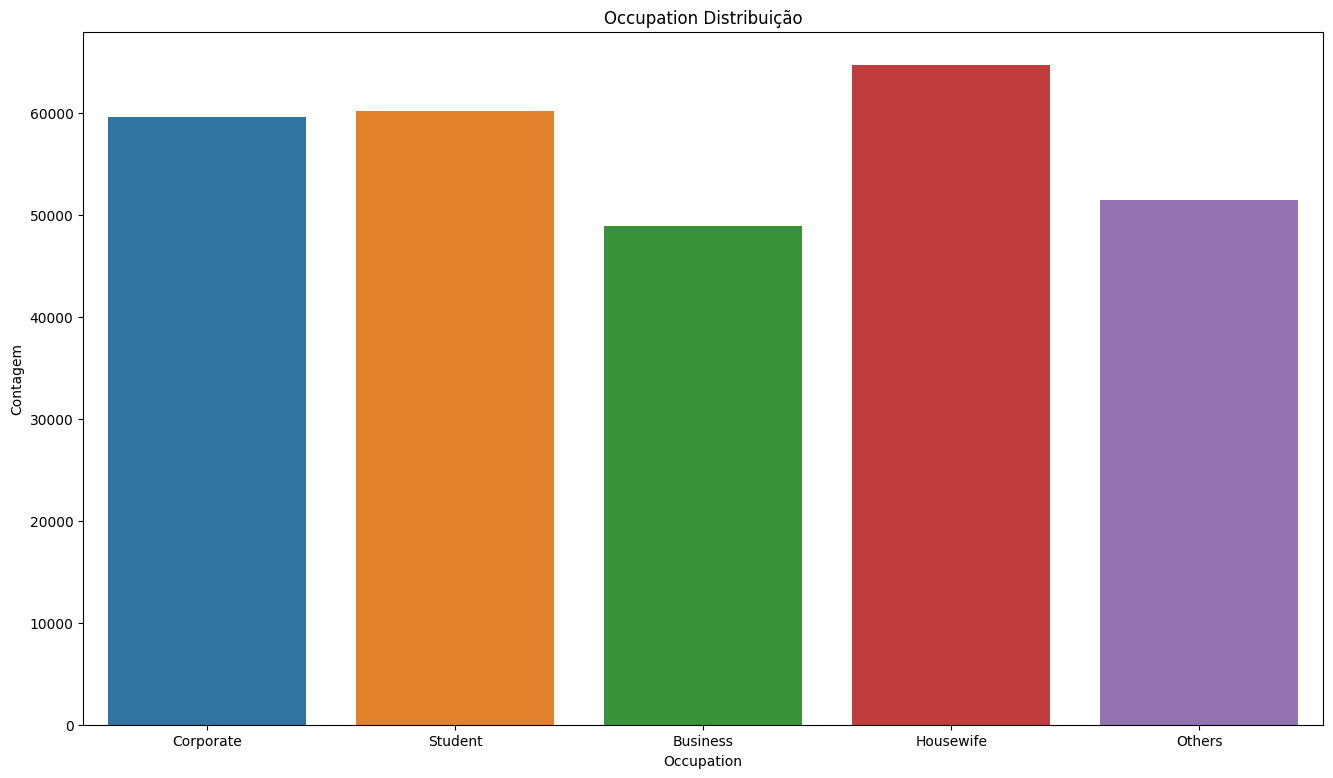

          Contagem Proporção
Housewife   64,728     22.7%
Student     60,164     21.1%
Corporate   59,614     20.9%
Others      51,430     18.1%
Business    48,922     17.2%


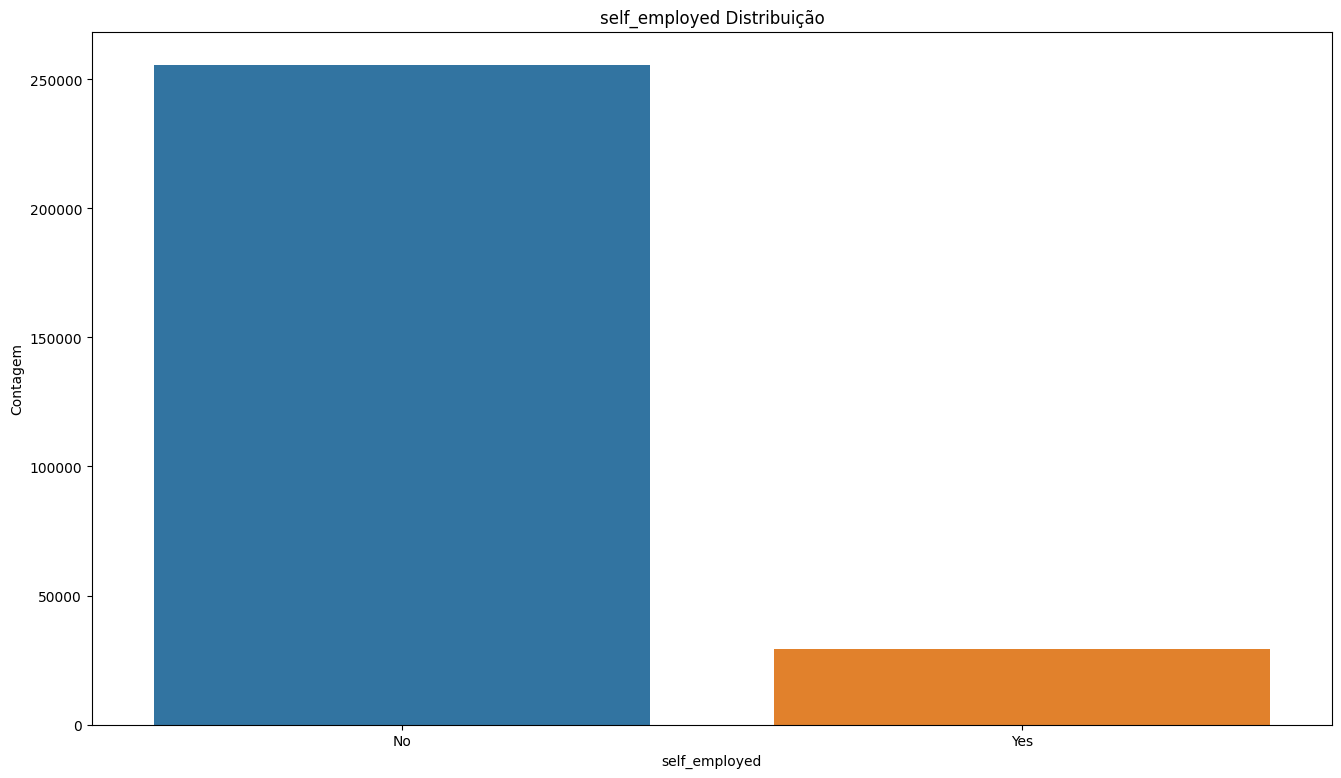

    Contagem Proporção
No   255,711     89.8%
Yes   29,147     10.2%


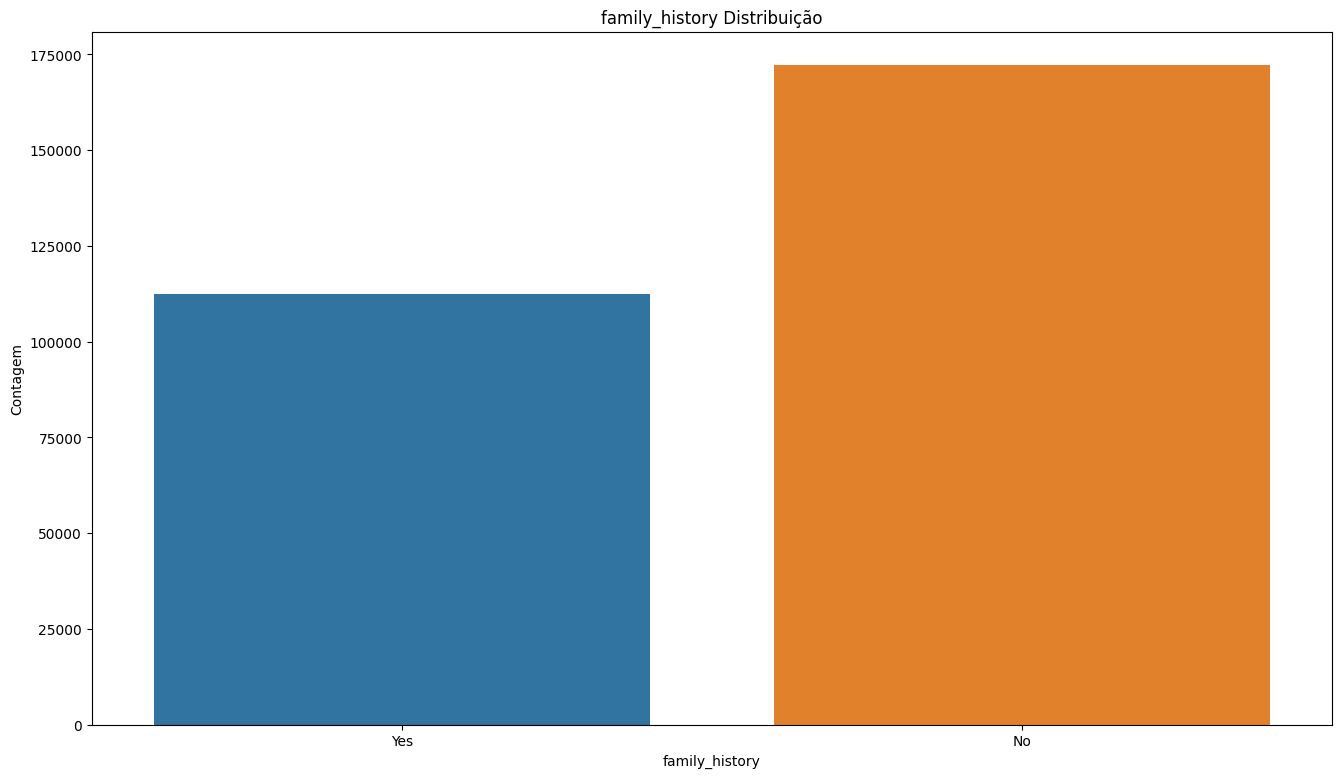

    Contagem Proporção
No   172,357     60.5%
Yes  112,501     39.5%


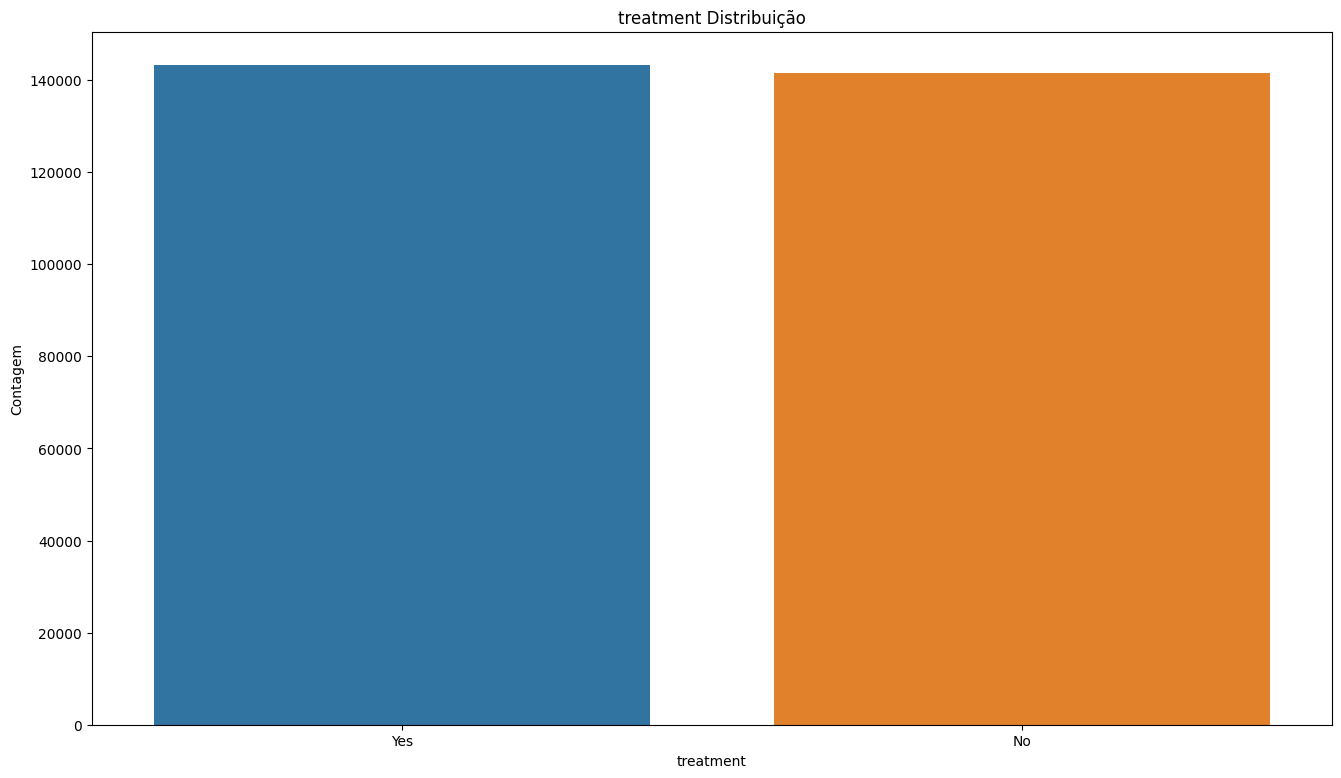

    Contagem Proporção
Yes  143,331     50.3%
No   141,527     49.7%


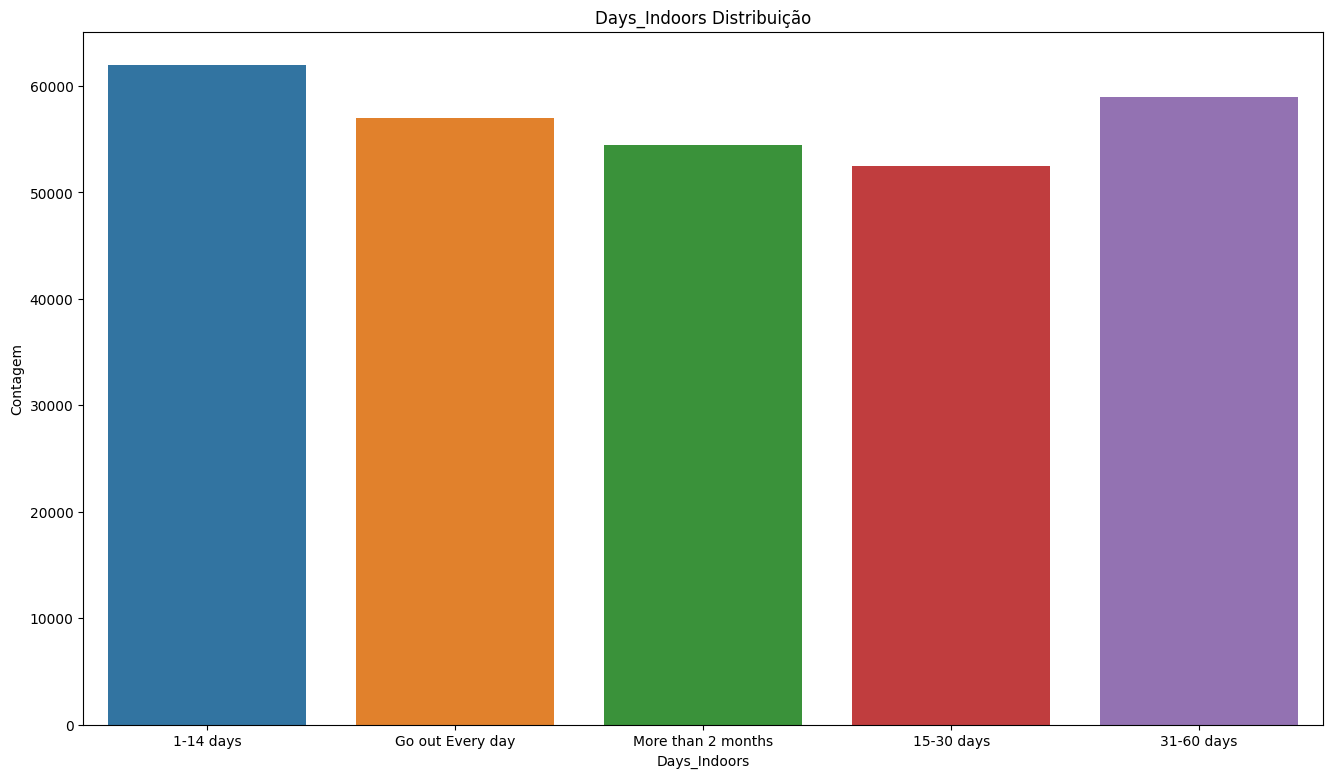

                   Contagem Proporção
1-14 days            61,994     21.8%
31-60 days           58,984     20.7%
Go out Every day     56,938     20.0%
More than 2 months   54,430     19.1%
15-30 days           52,512     18.4%


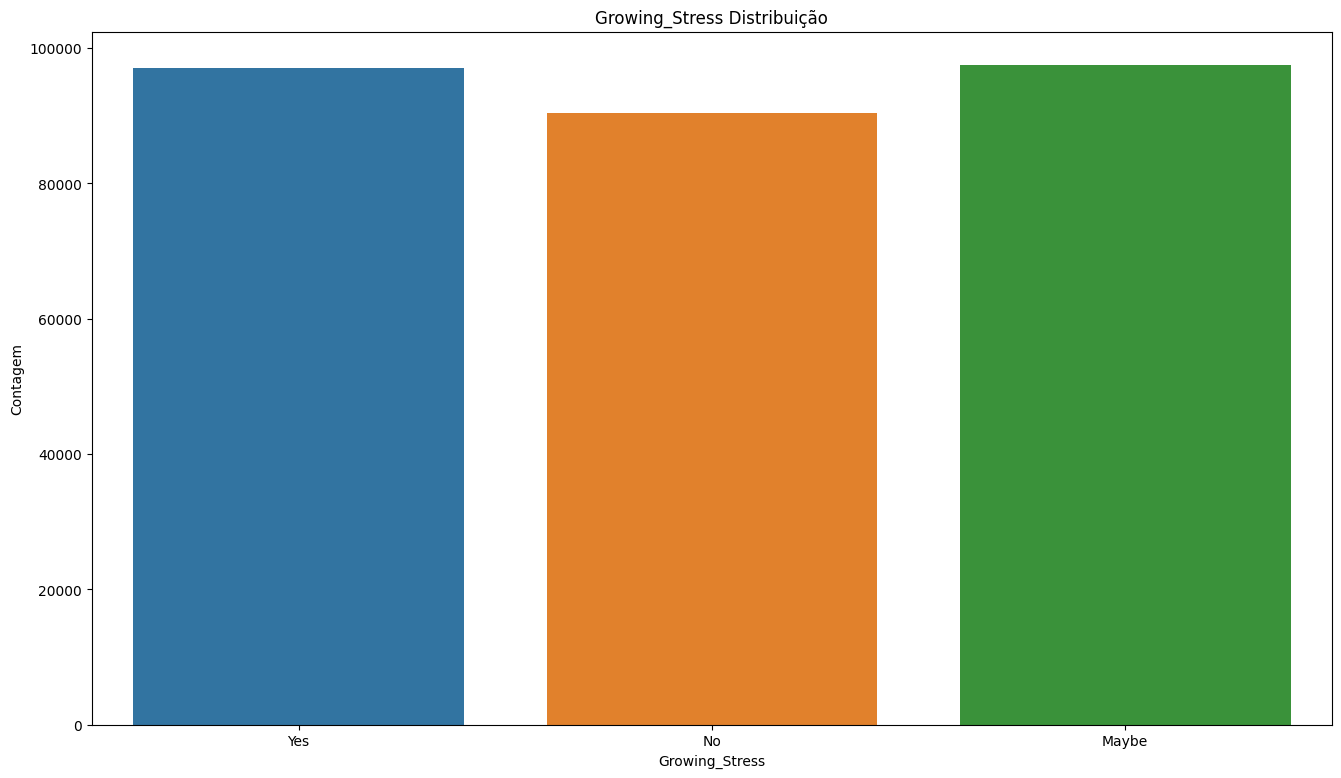

      Contagem Proporção
Maybe   97,540     34.2%
Yes     96,978     34.0%
No      90,340     31.7%


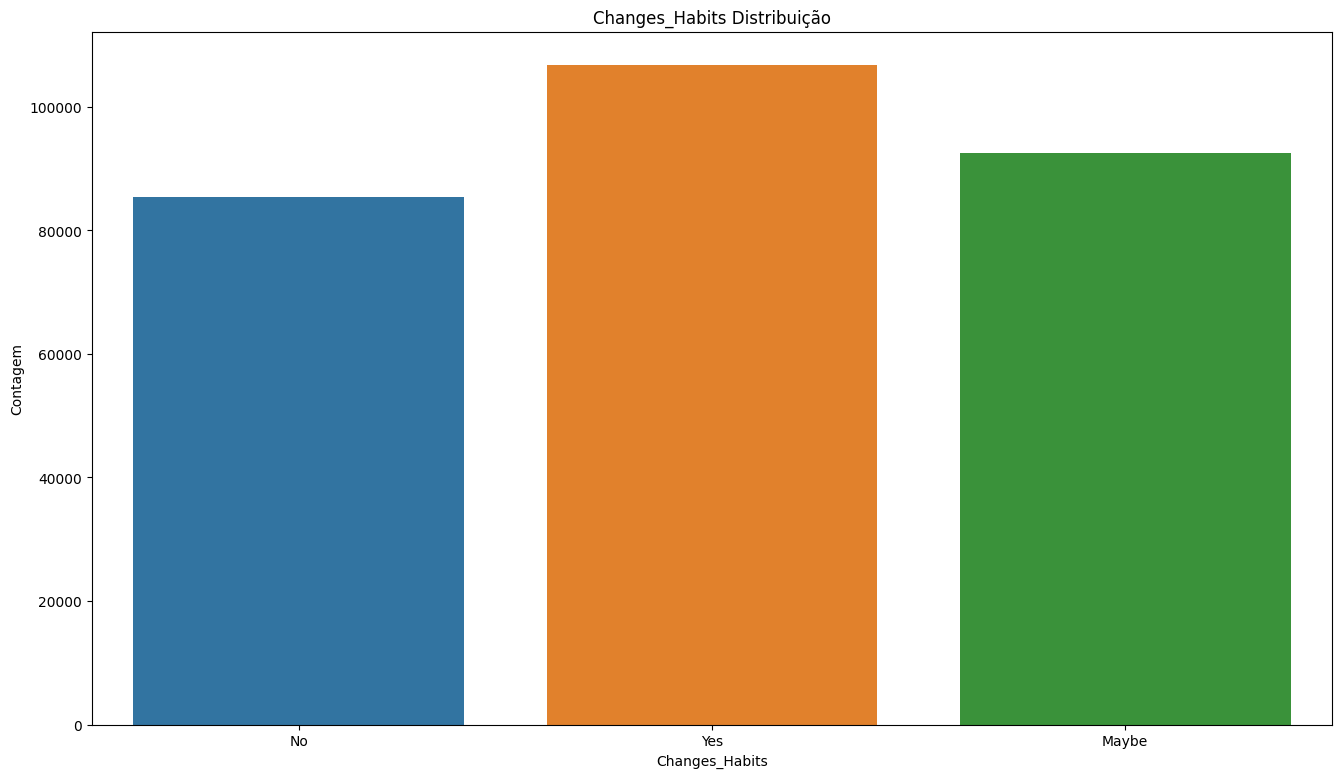

      Contagem Proporção
Yes    106,844     37.5%
Maybe   92,602     32.5%
No      85,412     30.0%


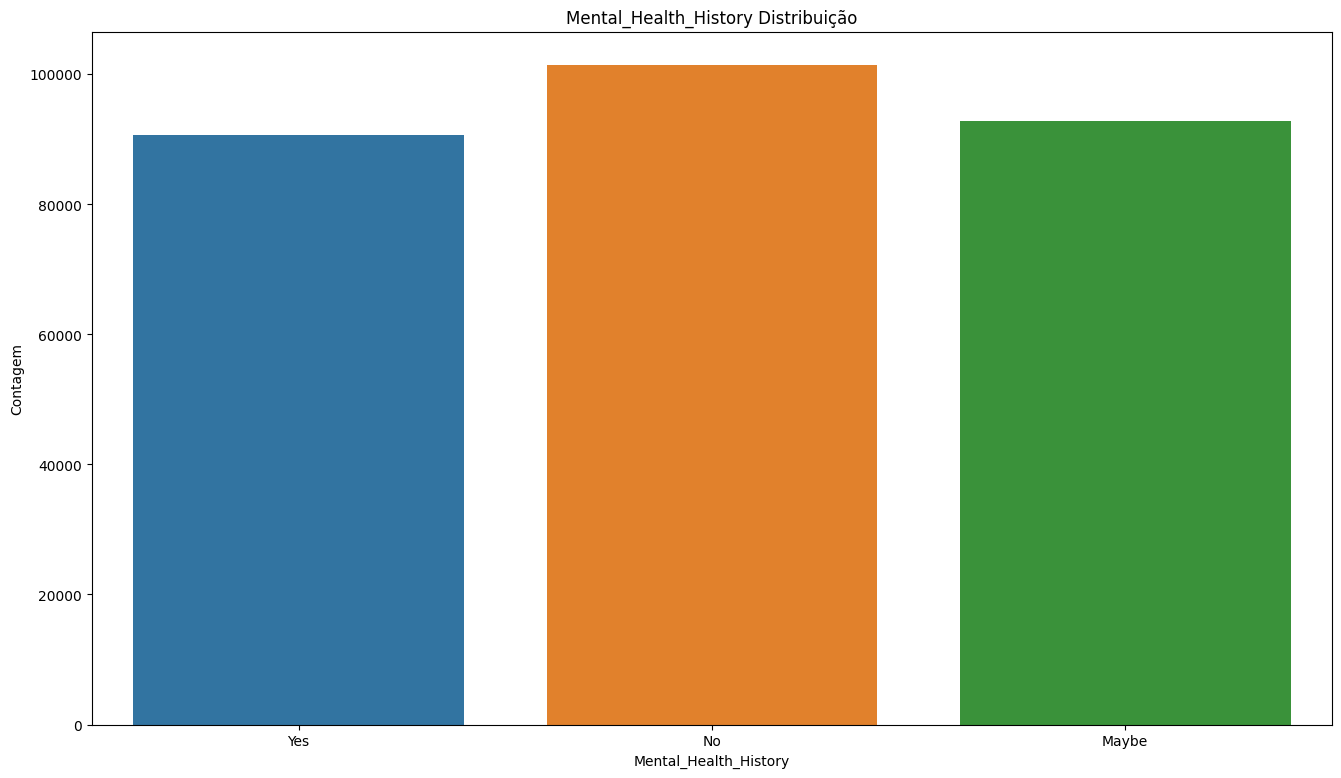

      Contagem Proporção
No     101,474     35.6%
Maybe   92,808     32.6%
Yes     90,576     31.8%


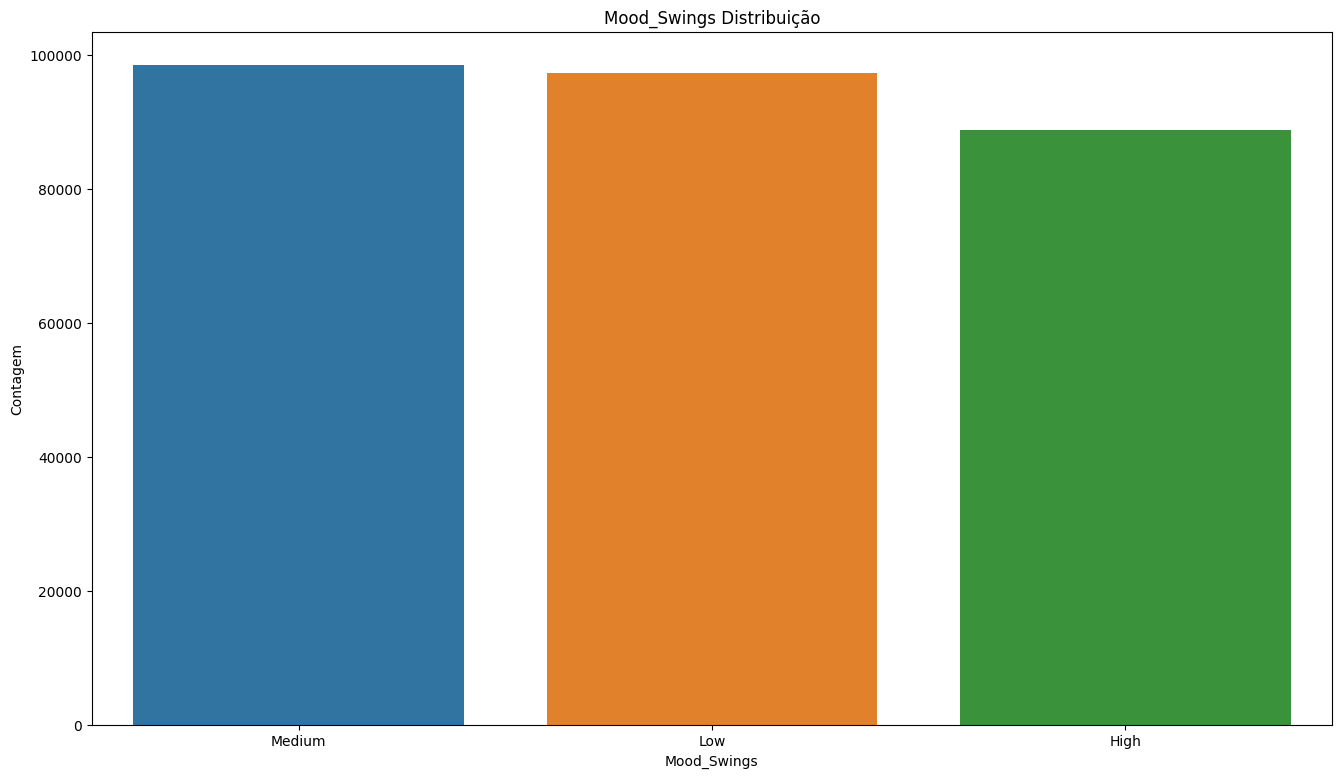

       Contagem Proporção
Medium   98,592     34.6%
Low      97,392     34.2%
High     88,874     31.2%


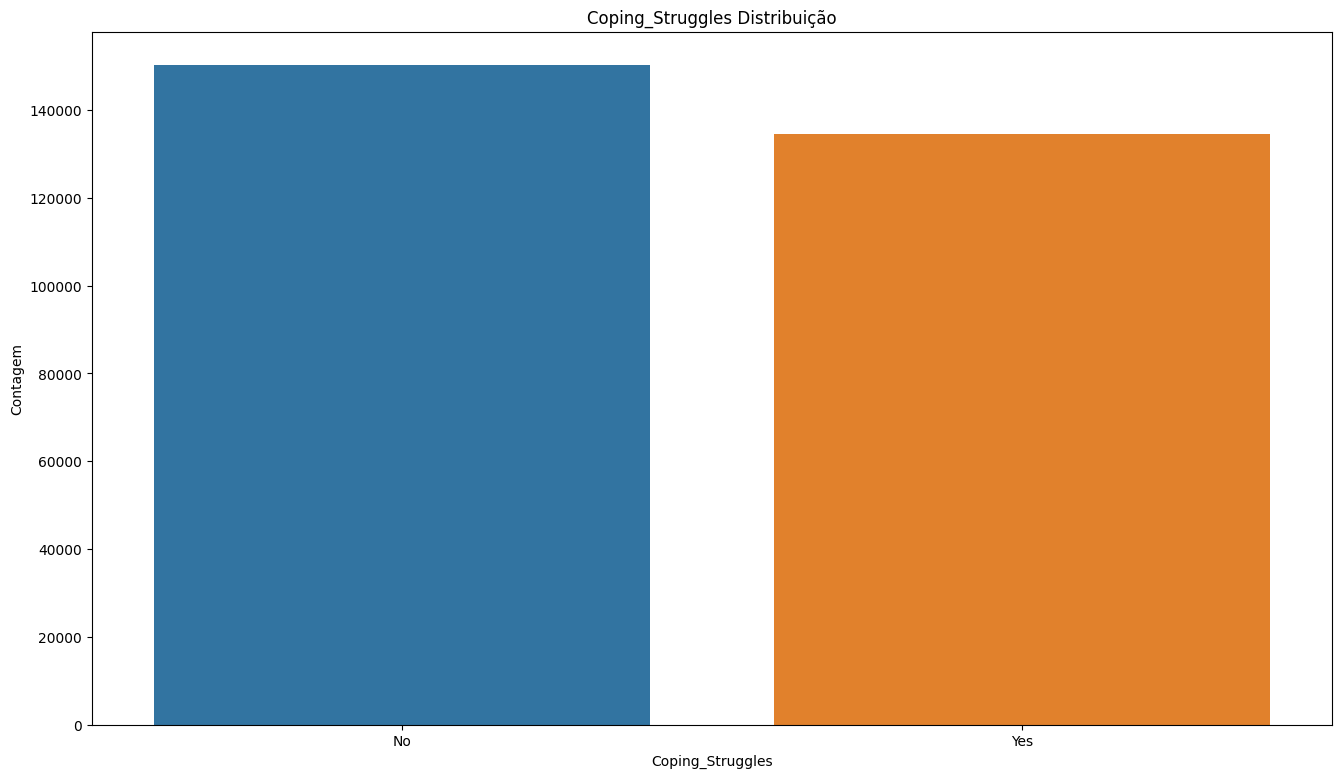

    Contagem Proporção
No   150,318     52.8%
Yes  134,540     47.2%


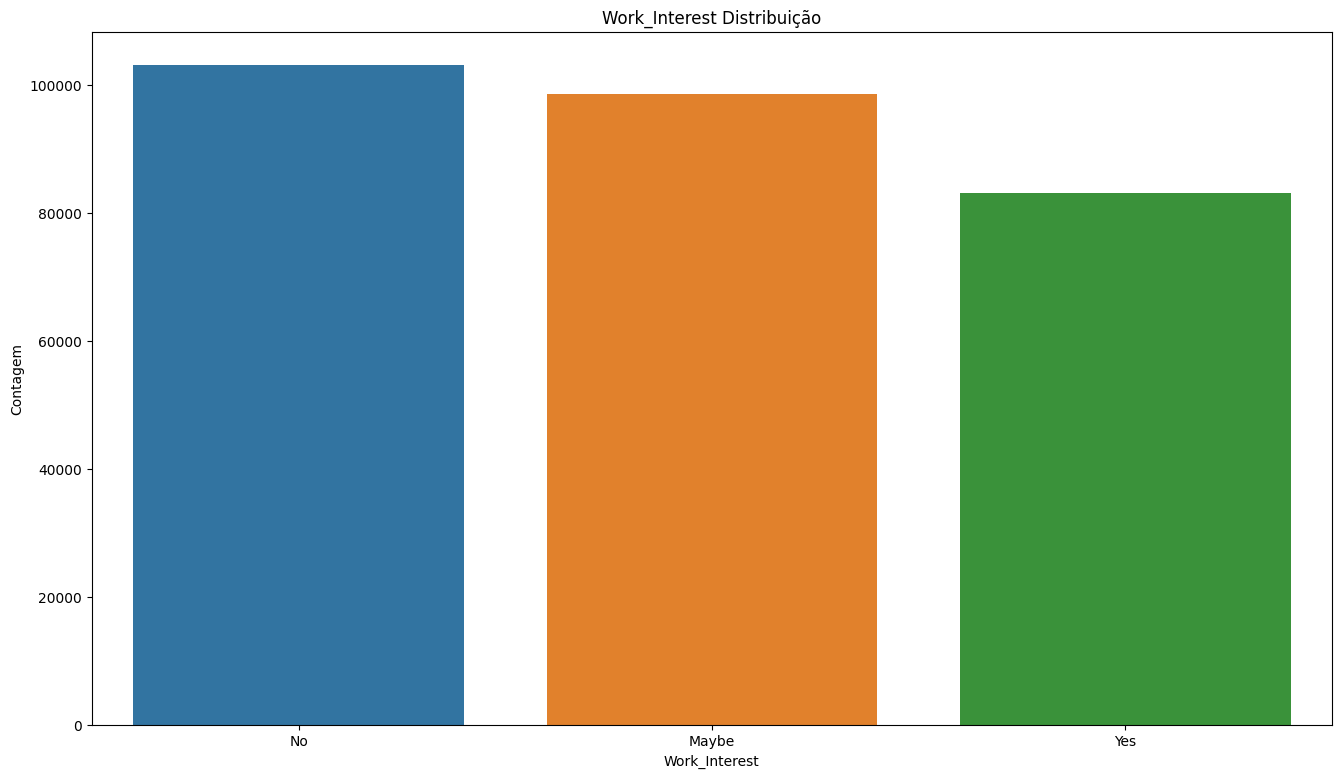

      Contagem Proporção
No     103,136     36.2%
Maybe   98,592     34.6%
Yes     83,130     29.2%


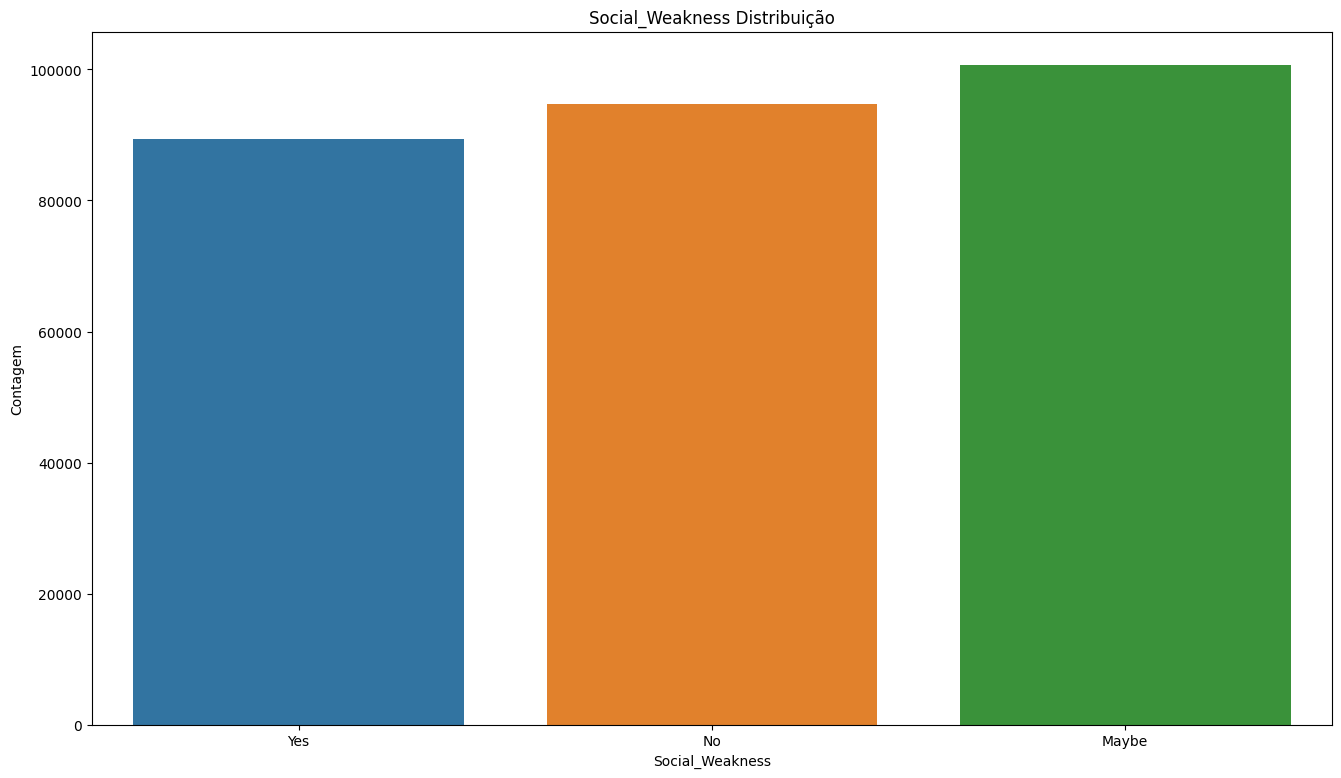

      Contagem Proporção
Maybe  100,746     35.4%
No      94,746     33.3%
Yes     89,366     31.4%


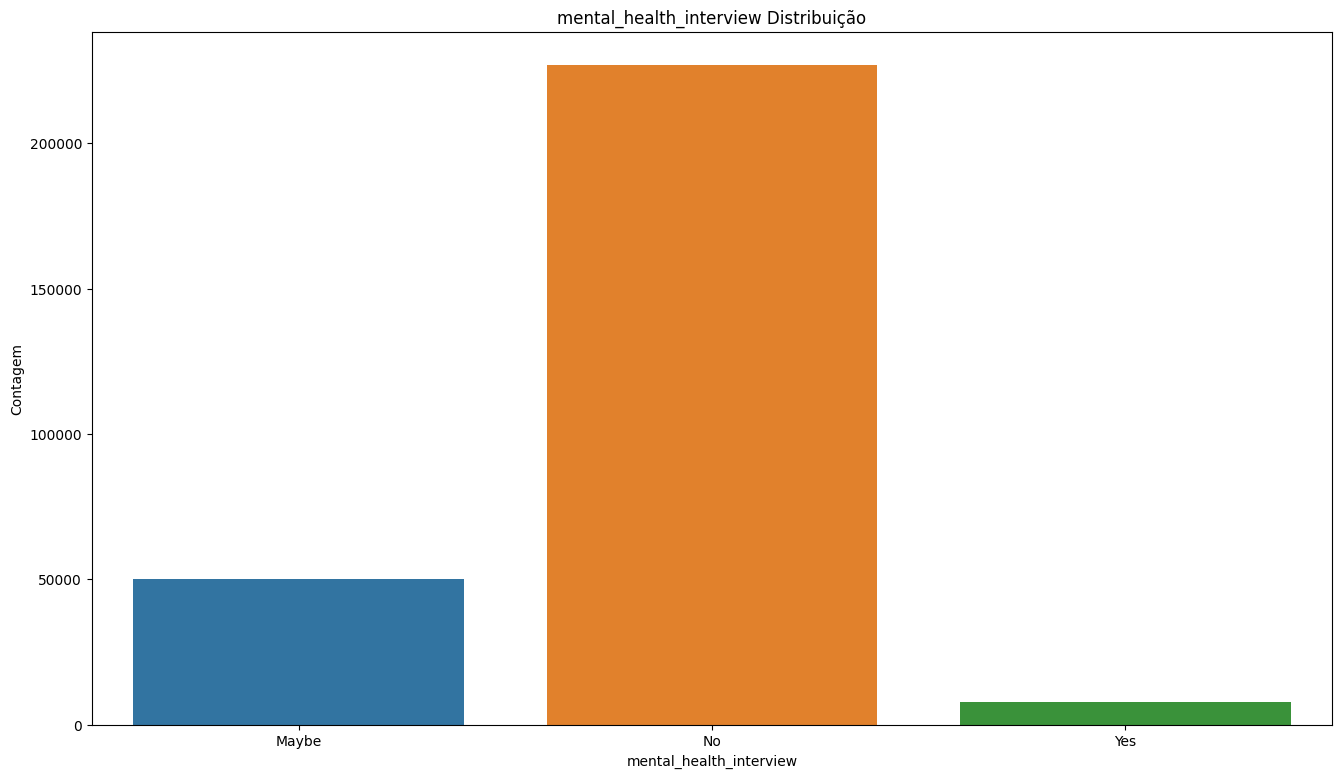

      Contagem Proporção
No     227,036     79.7%
Maybe   49,981     17.5%
Yes      7,841      2.8%


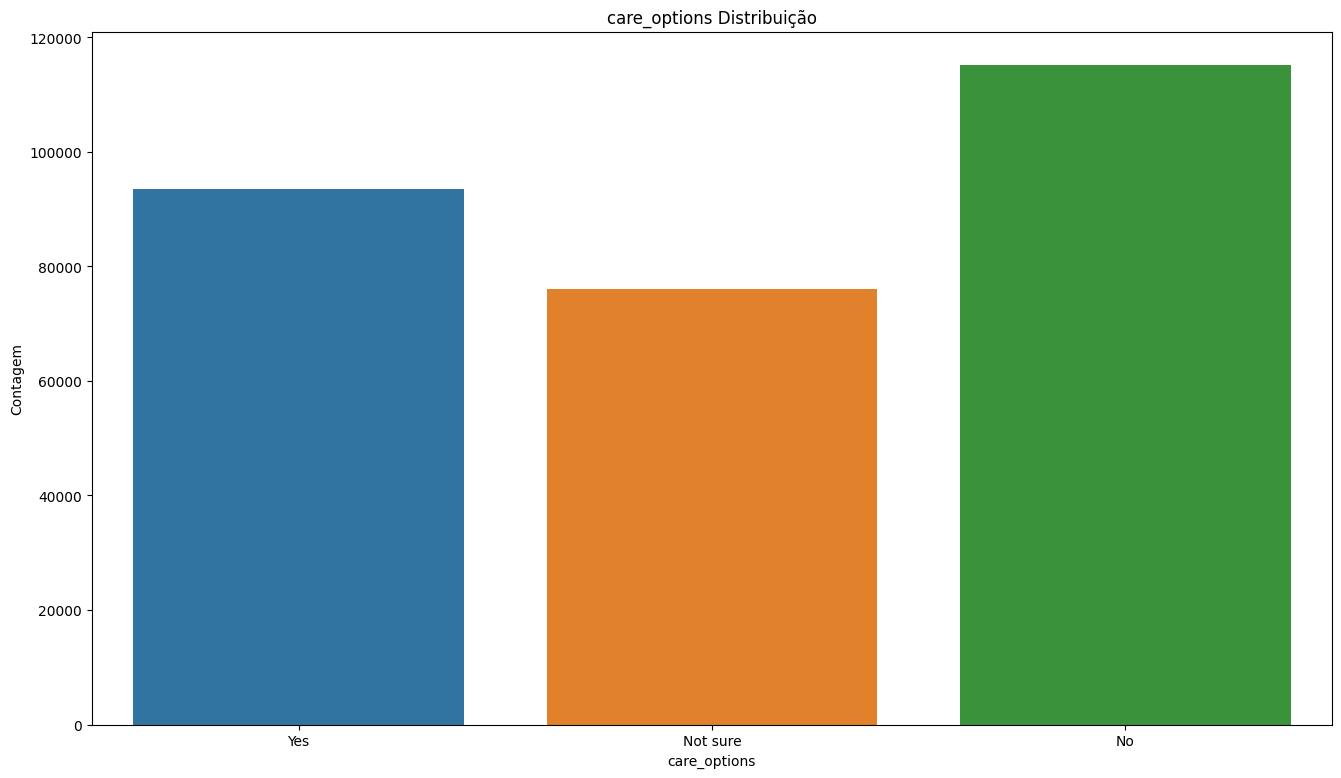

         Contagem Proporção
No        115,233     40.5%
Yes        93,577     32.9%
Not sure   76,048     26.7%


In [14]:

for column in mental.columns:
    if mental[column].dtype == 'object':
        contagrafico(column, figsize=(16, 9))  

In [15]:
def top_n_bar(mental, category, n=10, count=True, x_rotation=45, show_title=True):
    
    if count:
        top_n_df = mental[category].value_counts().head(n).reset_index()
        y_label = "Contagem"
    else:
        top_n_df = mental[category].value_counts(normalize=True).head(n).reset_index()
        y_label = "Proporção"

    # Plotting
    sns.barplot(data=top_n_df, x="index", y=category)
    if show_title:
        plt.title(f"Top {n} {category} {'Contagem' if count else 'Proporção'}")
    plt.xticks(rotation=x_rotation)
    plt.xlabel(category)
    plt.ylabel(y_label)
    plt.show()

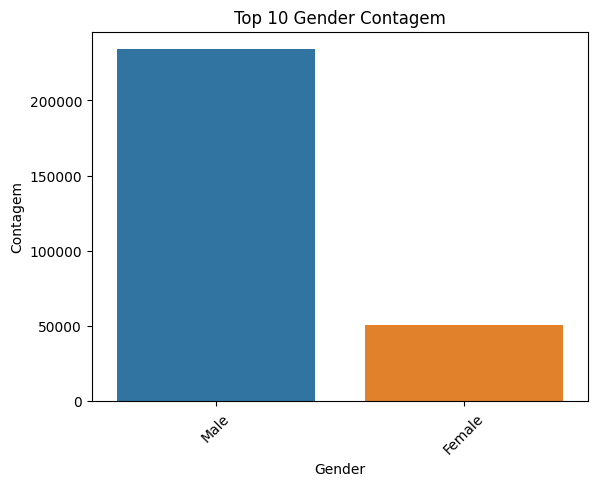

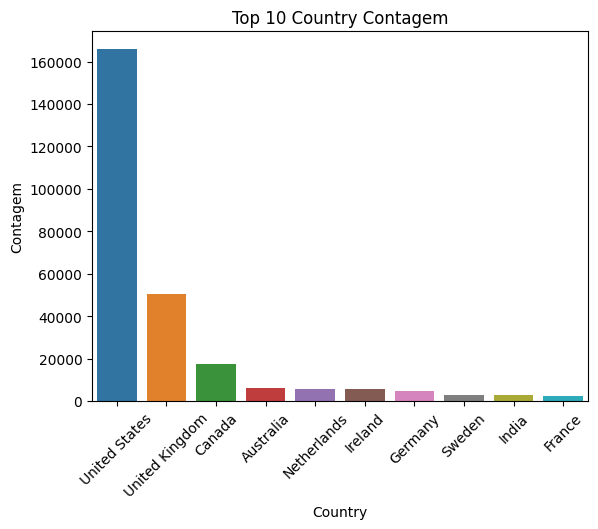

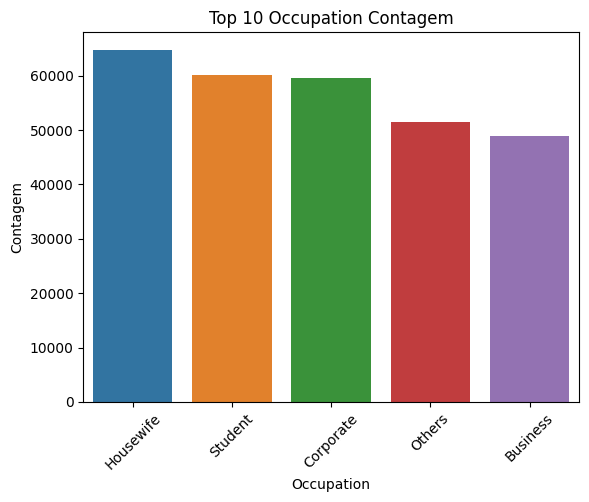

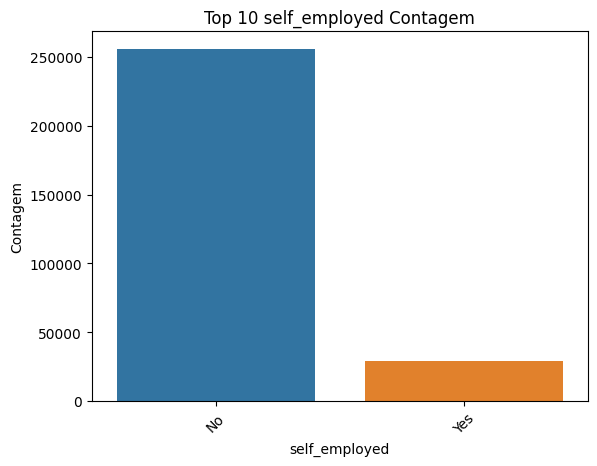

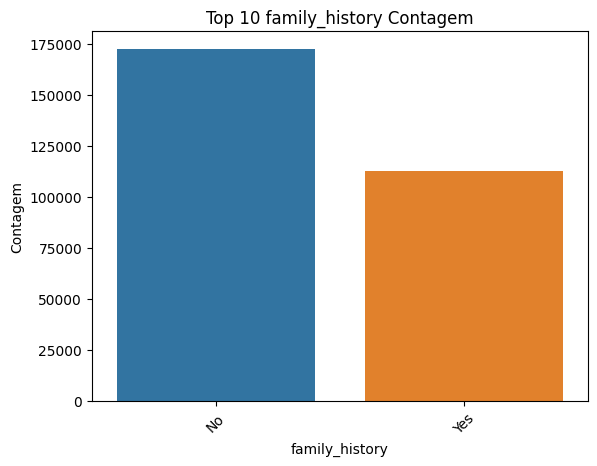

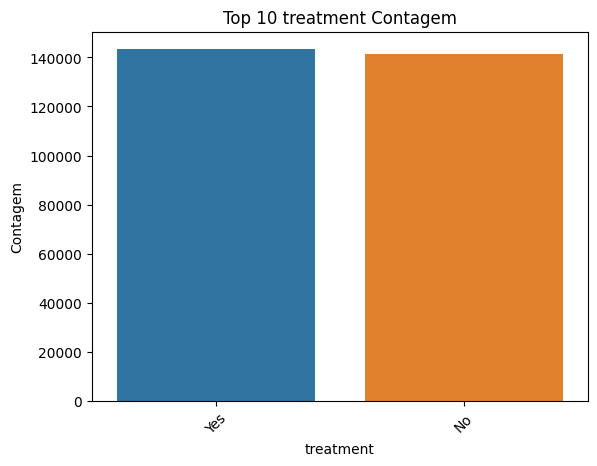

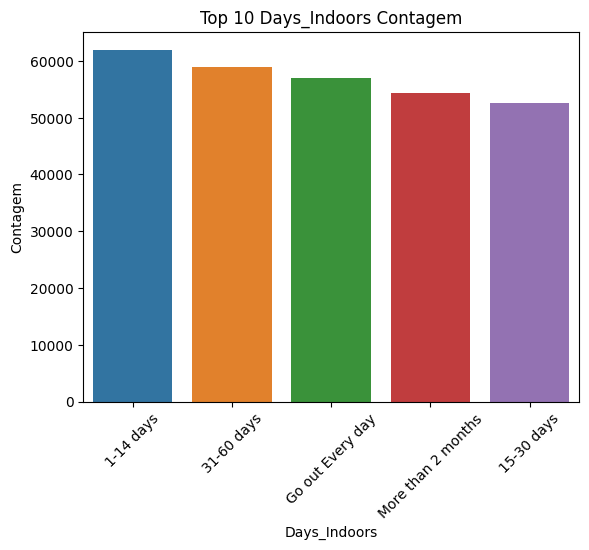

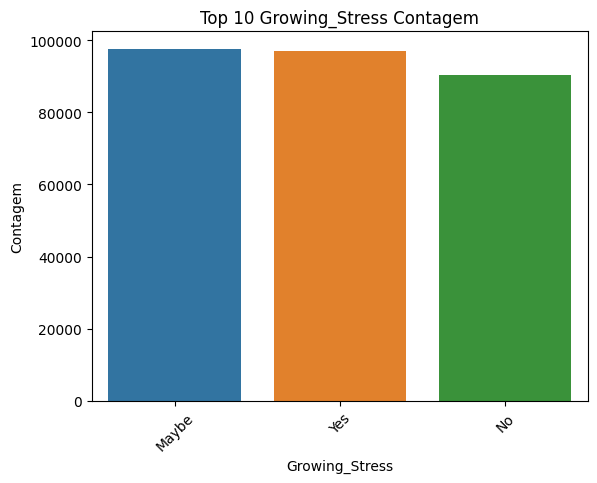

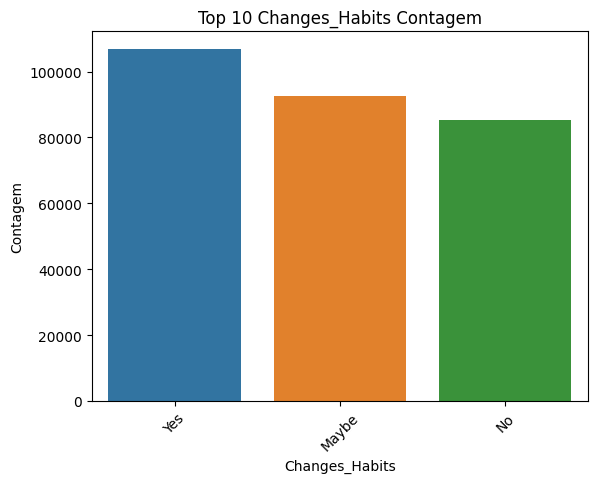

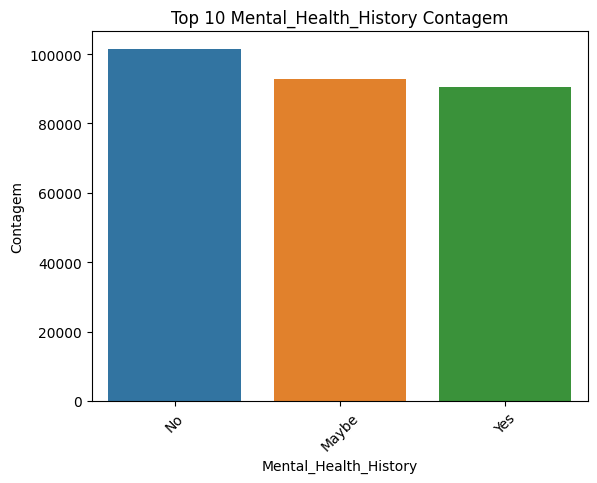

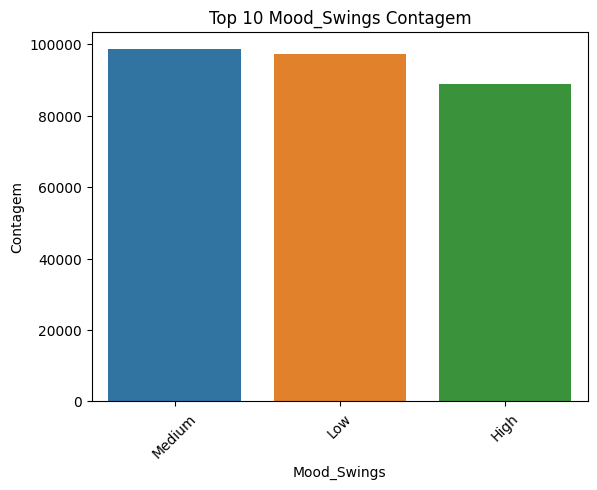

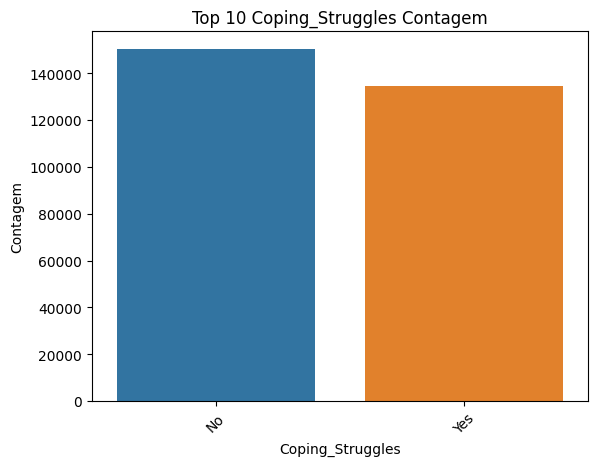

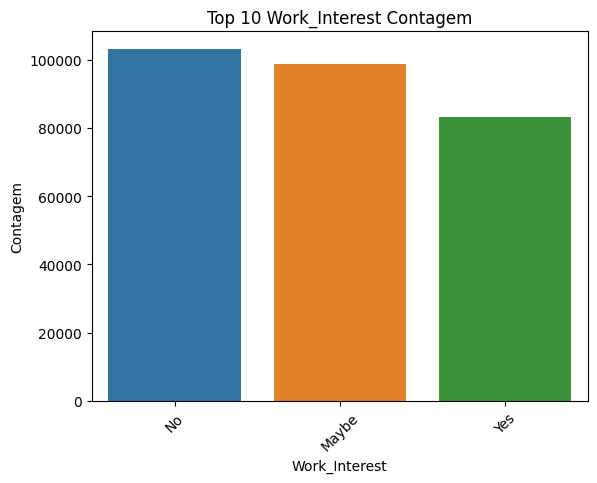

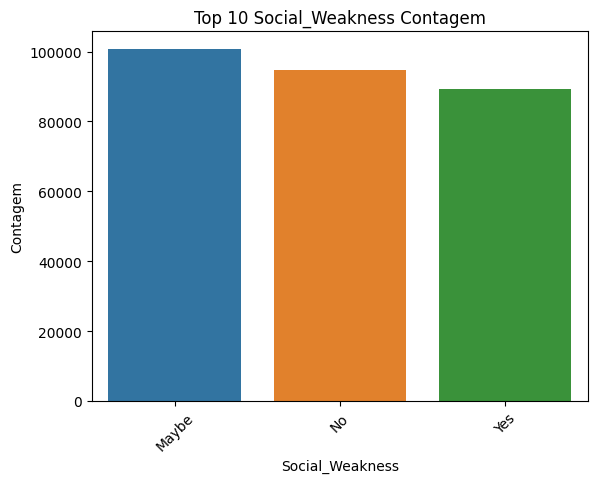

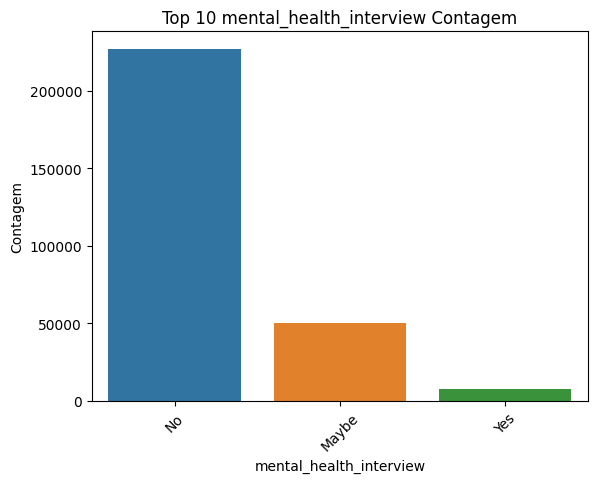

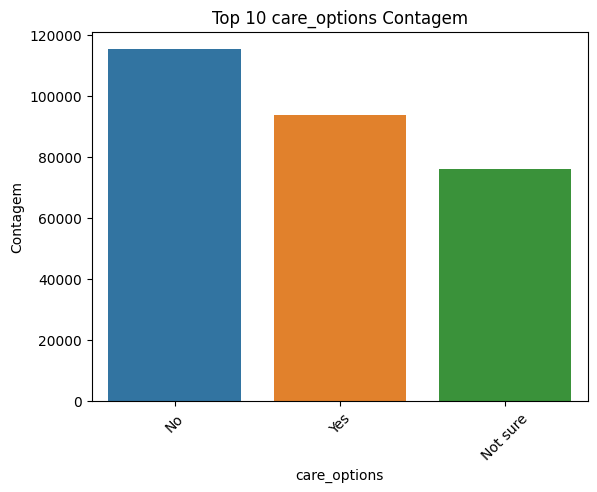

In [16]:
for column in mental.columns:
    if mental[column].dtype == 'object':
        top_n_bar(mental, column, n=10, count=True, x_rotation=45, show_title=True)

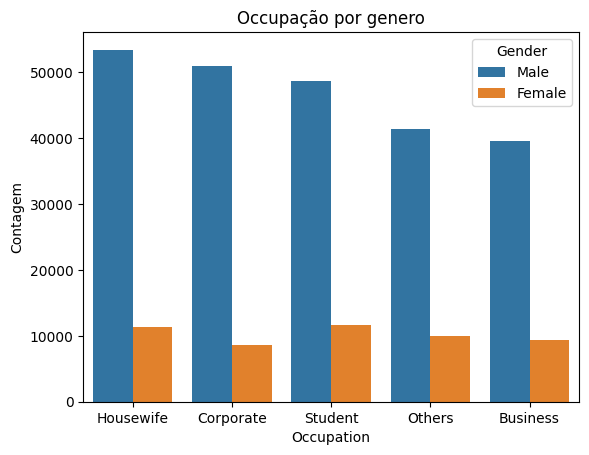

,Gender,Occupation,Contagem
5,Male,Housewife,53400
6,Male,Corporate,51000
7,Male,Student,48600
8,Male,Others,41400
9,Male,Business,39600
0,Female,Student,11564
1,Female,Housewife,11328
2,Female,Others,10030
3,Female,Business,9322
4,Female,Corporate,8614


In [17]:
# Group data by Gender then filter by Occupation and count occurrences
gender_data = (
    mental
    .groupby("Gender")["Occupation"]
    .value_counts()
    .reset_index(name = "Contagem")
    .sort_values(by = "Contagem", ascending = False)
)

sns.barplot(data = gender_data, x = "Occupation", y = "Contagem", hue = "Gender")
plt.title("Occupação por genero")
plt.show()

gender_data

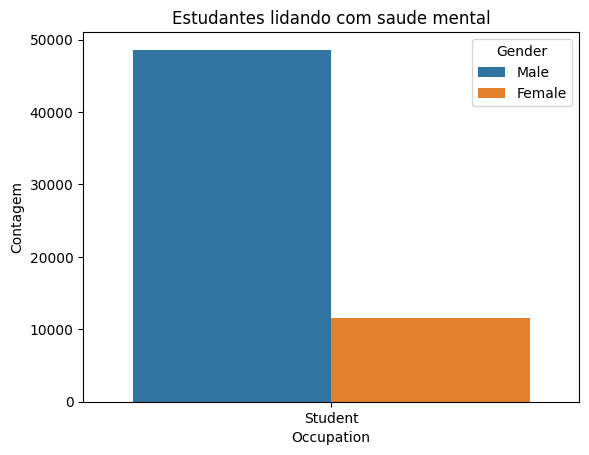

C:\Users\¬¬\AppData\Local\Temp\ipykernel_7888\2013233908.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_data["Porcentagem"] = (


,Gender,Occupation,Contagem,Porcentagem
7,Male,Student,48600,80.8
0,Female,Student,11564,19.2


In [18]:
student_data = gender_data[gender_data["Occupation"] == "Student"]

sns.barplot(data = student_data, x = "Occupation", y = "Contagem", hue = "Gender")
plt.title("Estudantes lidando com saude mental")
plt.show()

# Get the total count
total_student_count = student_data["Contagem"].sum() 

# Calculate percentages based on gender counts
student_data["Porcentagem"] = (
    student_data["Gender"]
    .apply(
        lambda gender: round((student_data.loc[student_data["Gender"] == gender, "Contagem"].iloc[0] / total_student_count) * 100, 1)
    )
)

student_data

Vamos pegar dos estados unidos, ja que a amostragem é maior

In [19]:
us_student_data = (
    mental
    .loc[(mental["Country"] == "United States") & (mental["Occupation"] == "Student")]
    .groupby("Gender")["Occupation"]
    .value_counts()
    .reset_index(name = "Contagem")
)

# Get the total count
total_us_student_count = us_student_data["Contagem"].sum() 

# Calculate percentages based on gender counts
us_student_data["Percentage"] = (
    us_student_data["Gender"]
    .apply(
        lambda gender: round((us_student_data.loc[us_student_data["Gender"] == gender, "Contagem"].iloc[0] / total_us_student_count) * 100, 1)
    )
)

us_student_data

,Gender,Occupation,Contagem,Percentage
0,Female,Student,7742,22.0
1,Male,Student,27378,78.0


In [20]:
print(f"De {total_student_count:,} estudantes ao redor do mundo lidando com saude mental, {total_us_student_count:,} são estudantes americanos.")

De 60,164 estudantes ao redor do mundo lidando com saude mental, 35,120 são estudantes americanos.


Isso quer dizer que cerca de 58% da crise de saude mental esta nos states.

Vamos usar o Label encoder :)

In [21]:
le = LabelEncoder()
encoded_df = mental.apply(le.fit_transform)

encoded_df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,0,34,1,0,1,1,0,2,1,2,2,0,1,2,0,2
4,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,2
5,0,25,1,0,0,1,0,2,1,2,2,0,1,2,0,1
6,0,0,1,0,1,1,0,2,1,2,2,0,1,2,1,1
7,0,34,1,0,0,0,0,2,1,2,2,0,1,2,1,0


In [22]:
X = encoded_df.drop("Coping_Struggles", axis = 1)

y = encoded_df["Coping_Struggles"]
y

3         0
4         0
5         0
6         0
7         0
         ..
292359    1
292360    1
292361    1
292362    1
292363    1
Name: Coping_Struggles, Length: 284858, dtype: int32

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(227886, 15) (56972, 15)
(227886,) (56972,)


In [24]:
def pipeline_classification(mental, pipelines):
    cv_results = []
    model_names = []
    model_predictions = {}
    model_probabilities = {}

    for name, pipe in pipelines:
        pipe.fit(X, y)

        kfold = KFold(n_splits=10, shuffle=True)
        cv_results.append(cross_val_score(pipe, X, y, cv=kfold, scoring='accuracy', n_jobs=-1))
        model_names.append(name)

        model_predictions[name] = pipe.predict(X)

        model_probabilities[name] = pipe.predict_proba(X)

    plt.boxplot(cv_results)
    plt.xticks(range(1, len(model_names) + 1), model_names, rotation=45)
    plt.title('Algorithm Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.show()

    results_df = pd.DataFrame({
        'Model': model_names,
        'Mean Accuracy': [scores.mean() for scores in cv_results],
        'Standard Deviation': [scores.std() for scores in cv_results]
    })

    return results_df, model_predictions, model_probabilities

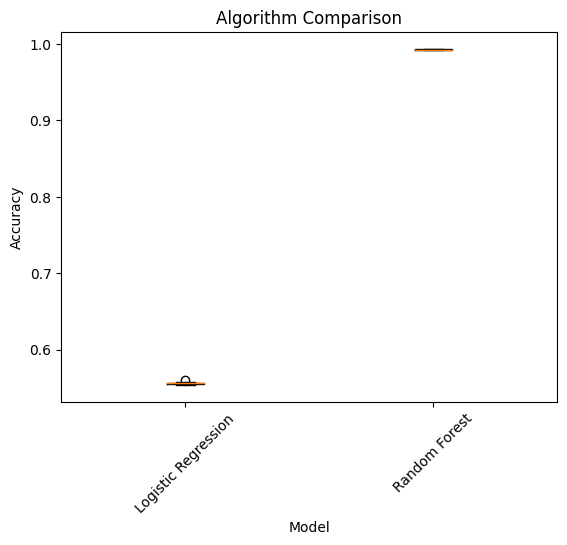

Results DataFrame:
                 Model  Mean Accuracy  Standard Deviation
0  Logistic Regression       0.556309            0.001591
1        Random Forest       0.992828            0.000415

Model Predictions:

Logistic Regression: [1 1 1 ... 0 0 0]

Random Forest: [0 0 0 ... 1 1 1]

Model Probabilities:

Logistic Regression: [[0.4845187  0.5154813 ]
 [0.48451668 0.51548332]
 [0.4845305  0.5154695 ]
 ...
 [0.60504042 0.39495958]
 [0.60504396 0.39495604]
 [0.60504396 0.39495604]]

Random Forest: [[1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 ...
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]]


In [30]:
# Criar uma lista de tuplas com o pipeline para a regressão logística
pipelines = [
    
    ('Logistic Regression', Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())])),
    ('Random Forest', Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())]))
]

# Chamar a função pipeline_classification apenas com a regressão logística
results_df, model_predictions, model_probabilities = pipeline_classification(mental, pipelines)

# Exibir os resultados
print("Results DataFrame:")
print(results_df)

print("\nModel Predictions:")
for name, predictions in model_predictions.items():
    print(f"\n{name}: {predictions}")

print("\nModel Probabilities:")
for name, probabilities in model_probabilities.items():
    print(f"\n{name}: {probabilities}")

Melhor resultado foi do Random Forest, como gosto dele, nunca decepciona.
vamos salvar num Csv as previsçoes e ser feliz

In [28]:
predictions = model_predictions['Random Forest']

# Criar um DataFrame com as previsões
predictions_df = pd.DataFrame({'Predictions': predictions})

# Salvar o DataFrame em um arquivo CSV
predictions_df.to_csv('previsão.csv', index=False)

## Conclusão

Neste projeto, exploramos a previsão de dificuldades de enfrentamento em saúde mental, utilizando técnicas de aprendizado de máquina aplicadas a um conjunto de dados abrangente. Ao comparar dois modelos - Regressão Logística e Random Forest -, observamos que o modelo Random Forest apresentou um desempenho significativamente melhor, alcançando uma precisão média impressionante de aproximadamente 99.27%. Isso ressalta a capacidade do modelo Random Forest em identificar padrões complexos nos dados e prever com precisão as dificuldades de enfrentamento em saúde mental.

## Impacto Humano

O desenvolvimento de um modelo preciso de previsão de dificuldades de enfrentamento em saúde mental tem o potencial de ter um impacto significativo na vida das pessoas. Ao antecipar essas dificuldades, podemos oferecer intervenções precoces e apoio direcionado para aqueles que mais precisam. Isso não apenas melhora o bem-estar emocional e psicológico dos indivíduos, mas também reduz o estigma associado à saúde mental e promove uma sociedade mais compassiva e solidária.

## Aplicações Futuras

Além de sua aplicação no campo da saúde mental, nosso modelo pode ser usado em uma variedade de cenários para identificar e mitigar o impacto de dificuldades emocionais e psicológicas. Por exemplo, ele pode ser implementado em escolas para identificar alunos em risco de enfrentar problemas emocionais, em locais de trabalho para oferecer suporte aos funcionários durante períodos de estresse, ou mesmo em plataformas de mídia social para detectar sinais de angústia entre os usuários.

